# Pontifícia Universidade Católica do Paraná
## Disciplina: Técnicas de Machine Learning
#### Conteúdo complementar da Semana 2

Aqui, carregarei todas as bibliotecas necessárias para trabalharmos neste notebook. Geralmente não há problema algum em você acabar fazendo alguns imports ao longo do notebook, mas confesso que fica melhor se você organizar todos os seus imports dentro de uma única célula.

Estarei fazendo alguns comentários (iniciados com `#`) ao lado de cada `import` para lhe explicar para que serve cada biblioteca. Note que você não é obrigado a fazer isto para cada biblioteca, mas faço isto com a intenção de lhe explicar. Note que o texto _após_ o comentário fica com uma formatação diferente: isto serve para que você, ao observar o código, já consiga visualmente diferenciar o que é código do que não seria um código em si.

In [1]:
import pandas as pd # biblioteca para o carregamento de datasets a partir de arquivos em Excel, CSV e outros formatos
import numpy as np # biblioteca para manipulação de vetores e matrizes grandes além de outras manipulações de dados de larga escala
import matplotlib.cm as mcm # biblioteca para mostrar gráficos (espeficamente uma parte para cores)
import matplotlib.pyplot as plt # biblioteca para mostrar gráficos (espeficamente uma parte para criar gráficos)
import seaborn as sns # outra biblioteca para mostrar gráficos (ela é especificamente boa para alguns tipos de gráficos, como mapas de calor)

from sklearn.preprocessing import StandardScaler # importando somente o StandardScaler do scikit-learn
from sklearn.datasets import load_wine # importando somente a função para obtermos o dataset wine (que já vem incluso no scikit-learn)
from sklearn.feature_selection import * # importando todas as funções específicas de seleção de atributos do scikit-learn
from sklearn.decomposition import * # importando todas as funções específicas para a extração de atributos do scikit-learn
from sklearn.cluster import * # importando todas as funções específicas para o agrupamento

## Dataset do Campeonato Brasileiro (Série A) de 2020

Este dataset serviu para mostrar a importância do escalonamento dos dados (isto é, deixá-los com uma escala numérica similar e comparável) dentro do conteúdo apresentado. Primeiramente, lemos os dados da tabela do Brasileirão os quais estão em um arquivo de texto. Você pode abrir o arquivo dentro do Bloco de Notas ou aplicação similar. O separador (isto é, o que divide os valores) é o <kbd>Tab</kbd> (tabulação).

Viu lá em cima que usamos o `import pandas as pd` ao invés de `import pandas`? O `as pd` serve para que façamos chamadas de código mais enxutas. Logo, é mais fácil digitar `pd.read_csv` do que `pandas.read_csv`.

Como o separador é o <kbd>Tab</kbd>, informamos que o separador (`sep`) é o <kbd>Tab</kbd>. O operador `\t` é outra forma de nos referirmos à tecla <kbd>Tab</kbd>. Como sabemos disso? <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html">Consultando sempre a documentação do Pandas</a>.

In [2]:
df = pd.read_csv('brasileirao.tsv', sep='\t') # lendo o arquivo. O resultado ficará no dataframe chamado "df"
df.tail() # o "tail" mostra o final do dataset. Se não colocarmos nada entre os parênteses teremos por padrão as últimas 5 linhas.

,Equipe,Gols a Favor,Vitórias,Aproveitamento,Derrotas,Gols Contra,Empates,Saldo de Gols,Pontos
15,Fluminense,55,18,56,10,42,10,13,64
16,São Paulo,59,18,58,8,41,12,18,66
17,Atlético-MG,64,20,60,10,45,8,19,68
18,Internacional,61,20,61,8,35,10,26,70
19,Flamengo,68,21,62,9,48,8,20,71


### Comparação para a normalização

Aqui, mostrarei dois gráficos: um deles utiliza as colunas `Derrotas` e `Saldo de Gols`.

(-35.0, 25.0)

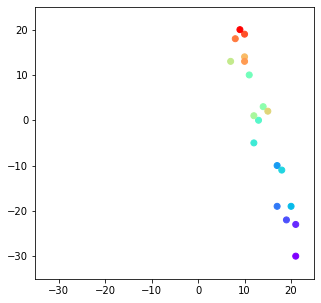

In [3]:
plt.figure(figsize=(5,5)) #criando uma figura com o mesmo tamanho nos dois eixos (isto é, uma imagem quadrada)
plt.scatter(df['Derrotas'], df['Saldo de Gols'], color=mcm.rainbow(np.linspace(0, 1, 20))) # mostrando um gráfico de dispersão (scatterplot) onde o eixo x representa os valores da coluna derrotas, o eixo y representa o saldo de gols e, finalmente, colocamos uma escala de cores para as bolinhas. As bolinhas são geradas de acordo com a ordem das linhas no dataframe
plt.xlim((-35,25)) # colocamos uma escala numérica para o eixo x (opcional, mas aqui é importante para vermos as diferentes ordens de grandeza)
plt.ylim((-35,25)) # colocamos uma escala numérica para o eixo y (opcional, mas aqui é importante para vermos as diferentes ordens de grandeza)

Agora, aplicarei o `StandardScaler` para padronizar as duas colunas. No final, mostro o dataset completo. Note que a escala numérica dessas duas colunas mudou. Depois, somente rodamos novamente o gráfico (agora com os valores já padronizados).

In [4]:
df[['Derrotas', 'Saldo de Gols']] = StandardScaler().fit_transform(df[['Derrotas', 'Saldo de Gols']])
df

,Equipe,Gols a Favor,Vitórias,Aproveitamento,Derrotas,Gols Contra,Empates,Saldo de Gols,Pontos
0,Botafogo,32,5,24,1.648929,62,12,-1.844626,27
1,Coritiba,31,7,27,1.648929,54,10,-1.414214,31
2,Goiás,41,9,32,1.203273,63,10,-1.352726,37
3,Vasco,37,10,36,0.757616,56,11,-1.168263,41
4,Fortaleza,34,10,36,0.757616,44,11,-0.614875,41
5,Sport,31,12,37,1.426101,50,6,-1.168263,42
6,Bahia,48,12,39,0.980444,59,8,-0.676363,44
7,Atlético-GO,40,12,44,-0.356525,45,14,-0.307438,50
8,Corinthians,45,13,45,-0.133697,45,12,0.000000,51
9,Bragantino,50,13,46,-0.579353,40,14,0.614875,53


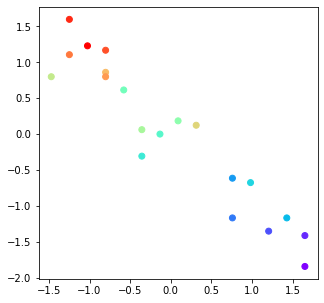

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(df['Derrotas'], df['Saldo de Gols'], color=mcm.rainbow(np.linspace(0, 1, 20)))

## Dataset de vinhos

Este dataset serviu para testarmos algumas técnicas de aprendizagem não-supervisionada. <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine">Ele é um toy dataset que já vem incluso no scikit-learn</a>. Note que possui dois atributos adicionais: `as_frame` (o qual estamos usando para que já esteja no formato compatível com o Pandas, o que ajuda muito na visualização) e `return_X_y` (o qual retorna dois dados somente: o dataframe com os dados de entrada - ou seja, todas as características dos vinhos; e os dados de saída - ou seja, a classe/label que estamos analisando. Aqui, seriam os três produtores de vinho. O `display` é uma função bem parecida com o `print` do Python, mas que permite uma melhor visualização dentro do Jupyter.

In [6]:
df_wine, target_wine = load_wine(as_frame=True, return_X_y=True)
display(df_wine.tail())
display(target_wine.tail())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0


173    2
174    2
175    2
176    2
177    2
Name: target, dtype: int64

## Seleção de Atributos
### VarianceThreshold
Aqui testamos diferentes técnicas na mesma base de dados (o `df_wine`). Primeiro, testamos o <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold">VarianceThreshold</a>. Como ele somente retorna uma matriz (lembra na disciplina de Raciocínio Computacional?), perdemos os nomes das colunas. Por outro lado, compare os resultados conforme vamos alterando o `threshold` (limite aceitável).

Ah, e antes que me esqueça: o pd.DataFrame cria um novo dataframe (já que o VarianceThreshold retorna uma matriz, como comentei) e contendo somente as colunas que importam.

In [7]:
for limite in [0.0, 0.1, 0.5, 0.8, 1.0]:
    display(f'Testando com um threshold de {limite}. Resultado:')
    sel = VarianceThreshold(threshold=limite)
    display(pd.DataFrame(sel.fit_transform(df_wine), columns=df_wine.columns[sel.get_support()]).tail())

'Testando com um threshold de 0.0. Resultado:'

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0


'Testando com um threshold de 0.1. Resultado:'

,alcohol,malic_acid,alcalinity_of_ash,magnesium,total_phenols,flavanoids,proanthocyanins,color_intensity,od280/od315_of_diluted_wines,proline
173,13.71,5.65,20.5,95.0,1.68,0.61,1.06,7.7,1.74,740.0
174,13.40,3.91,23.0,102.0,1.80,0.75,1.41,7.3,1.56,750.0
175,13.27,4.28,20.0,120.0,1.59,0.69,1.35,10.2,1.56,835.0
176,13.17,2.59,20.0,120.0,1.65,0.68,1.46,9.3,1.62,840.0
177,14.13,4.10,24.5,96.0,2.05,0.76,1.35,9.2,1.60,560.0


'Testando com um threshold de 0.5. Resultado:'

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,color_intensity,od280/od315_of_diluted_wines,proline
173,13.71,5.65,20.5,95.0,0.61,7.7,1.74,740.0
174,13.40,3.91,23.0,102.0,0.75,7.3,1.56,750.0
175,13.27,4.28,20.0,120.0,0.69,10.2,1.56,835.0
176,13.17,2.59,20.0,120.0,0.68,9.3,1.62,840.0
177,14.13,4.10,24.5,96.0,0.76,9.2,1.60,560.0


'Testando com um threshold de 0.8. Resultado:'

,malic_acid,alcalinity_of_ash,magnesium,flavanoids,color_intensity,proline
173,5.65,20.5,95.0,0.61,7.7,740.0
174,3.91,23.0,102.0,0.75,7.3,750.0
175,4.28,20.0,120.0,0.69,10.2,835.0
176,2.59,20.0,120.0,0.68,9.3,840.0
177,4.10,24.5,96.0,0.76,9.2,560.0


'Testando com um threshold de 1.0. Resultado:'

,malic_acid,alcalinity_of_ash,magnesium,color_intensity,proline
173,5.65,20.5,95.0,7.7,740.0
174,3.91,23.0,102.0,7.3,750.0
175,4.28,20.0,120.0,10.2,835.0
176,2.59,20.0,120.0,9.3,840.0
177,4.10,24.5,96.0,9.2,560.0


Lembra do `StandardScaler` que vimos há pouco? Vamos ver como ficaria com exatamente a mesma tabela, mas após usá-lo:

In [8]:
df_wine_scaled = StandardScaler().fit_transform(df_wine)

for limite in [0.0, 0.1, 0.5, 0.8, 1.0]:
    display(f'Testando com um threshold de {limite} (com StandardScaler). Resultado:')
    sel = VarianceThreshold(threshold=limite)
    display(pd.DataFrame(sel.fit_transform(df_wine_scaled), columns=df_wine.columns[sel.get_support()]).tail())

'Testando com um threshold de 0.0 (com StandardScaler). Resultado:'

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498
177,1.395086,1.583165,1.365208,1.502943,-0.262708,-0.392751,-1.274305,1.596623,-0.422075,1.791666,-1.524378,-1.428948,-0.595160


'Testando com um threshold de 0.1 (com StandardScaler). Resultado:'

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498
177,1.395086,1.583165,1.365208,1.502943,-0.262708,-0.392751,-1.274305,1.596623,-0.422075,1.791666,-1.524378,-1.428948,-0.595160


'Testando com um threshold de 0.5 (com StandardScaler). Resultado:'

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498
177,1.395086,1.583165,1.365208,1.502943,-0.262708,-0.392751,-1.274305,1.596623,-0.422075,1.791666,-1.524378,-1.428948,-0.595160


'Testando com um threshold de 0.8 (com StandardScaler). Resultado:'

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498
177,1.395086,1.583165,1.365208,1.502943,-0.262708,-0.392751,-1.274305,1.596623,-0.422075,1.791666,-1.524378,-1.428948,-0.595160


'Testando com um threshold de 1.0 (com StandardScaler). Resultado:'

,malic_acid,ash
173,2.974543,0.305159
174,1.412609,0.414820
175,1.744744,-0.389355
176,0.227694,0.012732
177,1.583165,1.365208


### SelectKBest

Como já criamos o `df_wine_scaled` anteriormente, não precisaremos recriá-lo aqui. Vamos comparar os resultados do `SelectKBest` para o `df_wine` antes e após a sua normalização. O `.shape` retorna a quantidade de **linhas e colunas** de um dataframe. Já o `.shape[0]` retorna só a quantidade de linhas (igual ao `len`, visto em Raciocínio Computacional) e o `shape[1]` retorna só a quantidade de colunas.

In [9]:
for limite in range(df_wine.shape[1]):
    display(f'Testando com um k={limite}. Resultado:')
    sel = SelectKBest(k=limite)
    display(pd.DataFrame(sel.fit_transform(df_wine, target_wine), columns=df_wine.columns[sel.get_support()]).tail())

'Testando com um k=0. Resultado:'

/opt/conda/lib/python3.8/site-packages/sklearn/feature_selection/_base.py:90: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn("No features were selected: either the data is"


""
173
174
175
176
177


'Testando com um k=1. Resultado:'

,flavanoids
173,0.61
174,0.75
175,0.69
176,0.68
177,0.76


'Testando com um k=2. Resultado:'

,flavanoids,proline
173,0.61,740.0
174,0.75,750.0
175,0.69,835.0
176,0.68,840.0
177,0.76,560.0


'Testando com um k=3. Resultado:'

,flavanoids,od280/od315_of_diluted_wines,proline
173,0.61,1.74,740.0
174,0.75,1.56,750.0
175,0.69,1.56,835.0
176,0.68,1.62,840.0
177,0.76,1.60,560.0


'Testando com um k=4. Resultado:'

,alcohol,flavanoids,od280/od315_of_diluted_wines,proline
173,13.71,0.61,1.74,740.0
174,13.40,0.75,1.56,750.0
175,13.27,0.69,1.56,835.0
176,13.17,0.68,1.62,840.0
177,14.13,0.76,1.60,560.0


'Testando com um k=5. Resultado:'

,alcohol,flavanoids,color_intensity,od280/od315_of_diluted_wines,proline
173,13.71,0.61,7.7,1.74,740.0
174,13.40,0.75,7.3,1.56,750.0
175,13.27,0.69,10.2,1.56,835.0
176,13.17,0.68,9.3,1.62,840.0
177,14.13,0.76,9.2,1.60,560.0


'Testando com um k=6. Resultado:'

,alcohol,flavanoids,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,0.61,7.7,0.64,1.74,740.0
174,13.40,0.75,7.3,0.70,1.56,750.0
175,13.27,0.69,10.2,0.59,1.56,835.0
176,13.17,0.68,9.3,0.60,1.62,840.0
177,14.13,0.76,9.2,0.61,1.60,560.0


'Testando com um k=7. Resultado:'

,alcohol,total_phenols,flavanoids,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,1.68,0.61,7.7,0.64,1.74,740.0
174,13.40,1.80,0.75,7.3,0.70,1.56,750.0
175,13.27,1.59,0.69,10.2,0.59,1.56,835.0
176,13.17,1.65,0.68,9.3,0.60,1.62,840.0
177,14.13,2.05,0.76,9.2,0.61,1.60,560.0


'Testando com um k=8. Resultado:'

,alcohol,malic_acid,total_phenols,flavanoids,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,5.65,1.68,0.61,7.7,0.64,1.74,740.0
174,13.40,3.91,1.80,0.75,7.3,0.70,1.56,750.0
175,13.27,4.28,1.59,0.69,10.2,0.59,1.56,835.0
176,13.17,2.59,1.65,0.68,9.3,0.60,1.62,840.0
177,14.13,4.10,2.05,0.76,9.2,0.61,1.60,560.0


'Testando com um k=9. Resultado:'

,alcohol,malic_acid,alcalinity_of_ash,total_phenols,flavanoids,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,5.65,20.5,1.68,0.61,7.7,0.64,1.74,740.0
174,13.40,3.91,23.0,1.80,0.75,7.3,0.70,1.56,750.0
175,13.27,4.28,20.0,1.59,0.69,10.2,0.59,1.56,835.0
176,13.17,2.59,20.0,1.65,0.68,9.3,0.60,1.62,840.0
177,14.13,4.10,24.5,2.05,0.76,9.2,0.61,1.60,560.0


'Testando com um k=10. Resultado:'

,alcohol,malic_acid,alcalinity_of_ash,total_phenols,flavanoids,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,5.65,20.5,1.68,0.61,1.06,7.7,0.64,1.74,740.0
174,13.40,3.91,23.0,1.80,0.75,1.41,7.3,0.70,1.56,750.0
175,13.27,4.28,20.0,1.59,0.69,1.35,10.2,0.59,1.56,835.0
176,13.17,2.59,20.0,1.65,0.68,1.46,9.3,0.60,1.62,840.0
177,14.13,4.10,24.5,2.05,0.76,1.35,9.2,0.61,1.60,560.0


'Testando com um k=11. Resultado:'

,alcohol,malic_acid,alcalinity_of_ash,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,5.65,20.5,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0
174,13.40,3.91,23.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0
175,13.27,4.28,20.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
176,13.17,2.59,20.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0
177,14.13,4.10,24.5,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0


'Testando com um k=12. Resultado:'

,alcohol,malic_acid,ash,alcalinity_of_ash,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,5.65,2.45,20.5,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0
177,14.13,4.10,2.74,24.5,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0


In [10]:
for limite in range(df_wine.shape[1]):
    display(f'Testando com um k={limite} (com StandardScaler). Resultado:')
    sel = SelectKBest(k=limite)
    display(pd.DataFrame(sel.fit_transform(df_wine_scaled, target_wine), columns=df_wine.columns[sel.get_support()]).tail())

'Testando com um k=0 (com StandardScaler). Resultado:'

/opt/conda/lib/python3.8/site-packages/sklearn/feature_selection/_base.py:90: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn("No features were selected: either the data is"


""
173
174
175
176
177


'Testando com um k=1 (com StandardScaler). Resultado:'

,flavanoids
173,-1.424900
174,-1.284344
175,-1.344582
176,-1.354622
177,-1.274305


'Testando com um k=2 (com StandardScaler). Resultado:'

,flavanoids,proline
173,-1.424900,-0.021952
174,-1.284344,0.009893
175,-1.344582,0.280575
176,-1.354622,0.296498
177,-1.274305,-0.595160


'Testando com um k=3 (com StandardScaler). Resultado:'

,flavanoids,od280/od315_of_diluted_wines,proline
173,-1.424900,-1.231206,-0.021952
174,-1.284344,-1.485445,0.009893
175,-1.344582,-1.485445,0.280575
176,-1.354622,-1.400699,0.296498
177,-1.274305,-1.428948,-0.595160


'Testando com um k=4 (com StandardScaler). Resultado:'

,alcohol,flavanoids,od280/od315_of_diluted_wines,proline
173,0.876275,-1.424900,-1.231206,-0.021952
174,0.493343,-1.284344,-1.485445,0.009893
175,0.332758,-1.344582,-1.485445,0.280575
176,0.209232,-1.354622,-1.400699,0.296498
177,1.395086,-1.274305,-1.428948,-0.595160


'Testando com um k=5 (com StandardScaler). Resultado:'

,alcohol,flavanoids,color_intensity,od280/od315_of_diluted_wines,proline
173,0.876275,-1.424900,1.142811,-1.231206,-0.021952
174,0.493343,-1.284344,0.969783,-1.485445,0.009893
175,0.332758,-1.344582,2.224236,-1.485445,0.280575
176,0.209232,-1.354622,1.834923,-1.400699,0.296498
177,1.395086,-1.274305,1.791666,-1.428948,-0.595160


'Testando com um k=6 (com StandardScaler). Resultado:'

,alcohol,flavanoids,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,0.876275,-1.424900,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,-1.284344,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,-1.344582,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,-1.354622,1.834923,-1.568252,-1.400699,0.296498
177,1.395086,-1.274305,1.791666,-1.524378,-1.428948,-0.595160


'Testando com um k=7 (com StandardScaler). Resultado:'

,alcohol,total_phenols,flavanoids,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,0.876275,-0.985614,-1.424900,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,-0.793334,-1.284344,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,-1.129824,-1.344582,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,-1.033684,-1.354622,1.834923,-1.568252,-1.400699,0.296498
177,1.395086,-0.392751,-1.274305,1.791666,-1.524378,-1.428948,-0.595160


'Testando com um k=8 (com StandardScaler). Resultado:'

,alcohol,malic_acid,total_phenols,flavanoids,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,0.876275,2.974543,-0.985614,-1.424900,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,-0.793334,-1.284344,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-1.129824,-1.344582,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,-1.033684,-1.354622,1.834923,-1.568252,-1.400699,0.296498
177,1.395086,1.583165,-0.392751,-1.274305,1.791666,-1.524378,-1.428948,-0.595160


'Testando com um k=9 (com StandardScaler). Resultado:'

,alcohol,malic_acid,alcalinity_of_ash,total_phenols,flavanoids,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,0.876275,2.974543,0.301803,-0.985614,-1.424900,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,1.052516,-0.793334,-1.284344,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,0.151661,-1.129824,-1.344582,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.151661,-1.033684,-1.354622,1.834923,-1.568252,-1.400699,0.296498
177,1.395086,1.583165,1.502943,-0.392751,-1.274305,1.791666,-1.524378,-1.428948,-0.595160


'Testando com um k=10 (com StandardScaler). Resultado:'

,alcohol,malic_acid,alcalinity_of_ash,total_phenols,flavanoids,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,0.876275,2.974543,0.301803,-0.985614,-1.424900,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,1.052516,-0.793334,-1.284344,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,0.151661,-1.129824,-1.344582,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.151661,-1.033684,-1.354622,-0.229346,1.834923,-1.568252,-1.400699,0.296498
177,1.395086,1.583165,1.502943,-0.392751,-1.274305,-0.422075,1.791666,-1.524378,-1.428948,-0.595160


'Testando com um k=11 (com StandardScaler). Resultado:'

,alcohol,malic_acid,alcalinity_of_ash,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,0.876275,2.974543,0.301803,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,1.052516,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,0.151661,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.151661,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498
177,1.395086,1.583165,1.502943,-0.392751,-1.274305,1.596623,-0.422075,1.791666,-1.524378,-1.428948,-0.595160


'Testando com um k=12 (com StandardScaler). Resultado:'

,alcohol,malic_acid,ash,alcalinity_of_ash,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,0.876275,2.974543,0.305159,0.301803,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498
177,1.395086,1.583165,1.365208,1.502943,-0.392751,-1.274305,1.596623,-0.422075,1.791666,-1.524378,-1.428948,-0.595160


### SelectPercentile

In [11]:
for limite in [5, 10, 50, 80, 100]:
    display(f'Testando com um percentile={limite}. Resultado:')
    sel = SelectPercentile(percentile=limite)
    display(pd.DataFrame(sel.fit_transform(df_wine, target_wine), columns=df_wine.columns[sel.get_support()]).tail())

'Testando com um percentile=5. Resultado:'

,flavanoids
173,0.61
174,0.75
175,0.69
176,0.68
177,0.76


'Testando com um percentile=10. Resultado:'

,flavanoids,proline
173,0.61,740.0
174,0.75,750.0
175,0.69,835.0
176,0.68,840.0
177,0.76,560.0


'Testando com um percentile=50. Resultado:'

,alcohol,flavanoids,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,0.61,7.7,0.64,1.74,740.0
174,13.40,0.75,7.3,0.70,1.56,750.0
175,13.27,0.69,10.2,0.59,1.56,835.0
176,13.17,0.68,9.3,0.60,1.62,840.0
177,14.13,0.76,9.2,0.61,1.60,560.0


'Testando com um percentile=80. Resultado:'

,alcohol,malic_acid,alcalinity_of_ash,total_phenols,flavanoids,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,5.65,20.5,1.68,0.61,1.06,7.7,0.64,1.74,740.0
174,13.40,3.91,23.0,1.80,0.75,1.41,7.3,0.70,1.56,750.0
175,13.27,4.28,20.0,1.59,0.69,1.35,10.2,0.59,1.56,835.0
176,13.17,2.59,20.0,1.65,0.68,1.46,9.3,0.60,1.62,840.0
177,14.13,4.10,24.5,2.05,0.76,1.35,9.2,0.61,1.60,560.0


'Testando com um percentile=100. Resultado:'

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0


In [12]:
for limite in [5, 10, 50, 80, 100]:
    display(f'Testando com um percentile={limite}. Resultado:')
    sel = SelectPercentile(percentile=limite)
    display(pd.DataFrame(sel.fit_transform(df_wine_scaled, target_wine), columns=df_wine.columns[sel.get_support()]).tail())

'Testando com um percentile=5. Resultado:'

,flavanoids
173,-1.424900
174,-1.284344
175,-1.344582
176,-1.354622
177,-1.274305


'Testando com um percentile=10. Resultado:'

,flavanoids,proline
173,-1.424900,-0.021952
174,-1.284344,0.009893
175,-1.344582,0.280575
176,-1.354622,0.296498
177,-1.274305,-0.595160


'Testando com um percentile=50. Resultado:'

,alcohol,flavanoids,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,0.876275,-1.424900,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,-1.284344,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,-1.344582,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,-1.354622,1.834923,-1.568252,-1.400699,0.296498
177,1.395086,-1.274305,1.791666,-1.524378,-1.428948,-0.595160


'Testando com um percentile=80. Resultado:'

,alcohol,malic_acid,alcalinity_of_ash,total_phenols,flavanoids,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,0.876275,2.974543,0.301803,-0.985614,-1.424900,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,1.052516,-0.793334,-1.284344,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,0.151661,-1.129824,-1.344582,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.151661,-1.033684,-1.354622,-0.229346,1.834923,-1.568252,-1.400699,0.296498
177,1.395086,1.583165,1.502943,-0.392751,-1.274305,-0.422075,1.791666,-1.524378,-1.428948,-0.595160


'Testando com um percentile=100. Resultado:'

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498
177,1.395086,1.583165,1.365208,1.502943,-0.262708,-0.392751,-1.274305,1.596623,-0.422075,1.791666,-1.524378,-1.428948,-0.595160


## Extração de atributos
### PCA
A documentação do scikit-learn possui uma <a href="https://scikit-learn.org/stable/modules/decomposition.html">explicação bem interessante sobre PCA</a>, caso tenha interesse. Aqui, o PCA é basicamente sobre extrair _novos_ atributos a partir dos atributos já existentes. Sendo assim, vamos aplicar o PCA no exemplo do wine. Consulte a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA">documentação específica do PCA</a> para entender que tipo de operações seriam possíveis com ele.

In [13]:
pca = PCA(n_components=df_wine.shape[1]) # colocando que queremos que o número de componentes seja igual ao que já temos hoje para fins de visualização e estudo
pca.fit(df_wine)

PCA(n_components=13)

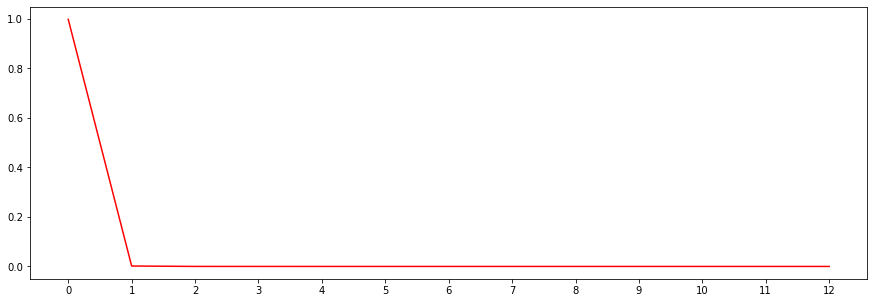

In [14]:
plt.figure(figsize=(15, 5)) # criando um gráfico retangular para facilitar a visualização
plt.plot(pca.explained_variance_ratio_, color='r') # colocando a porcentagem de variância que cada componente nos trouxe
plt.xticks(np.arange(df_wine.shape[1])) # mostrando todos os números no eixo x
plt.show() # mostrando o gráfico final

Agora, como interpretamos isso? Existe um método chamado **elbow method** (ou _método do cotovelo_) que pode ajudar. Basicamente olhamos da esquerda para direita e paramos quando identificamos um "cotovelo" no gráfico: isto é, indo para a direita veríamos que não teríamos mais grandes alterações na curva indicando, assim, que haveríamos chegado à quantidade ideal de componentes e não valeria o esforço selecionarmos mais componentes. Olhando para o gráfico acima fica fácil: à direita do **1** no eixo x não vemos uma mudança no comportamento: logo, os componentes 0 e 1 seriam os mais adequados (em outras palavras, somente 2 componentes).

Por outro lado, o componente 0 parece ser estranhamente relevante em relação aos demais, não é? Olhando a documentação do scikit-learn sobre o PCA encontramos um item interessante chamado `components_`. Com ele, conseguimos ver a contribuição de cada um dos atributos (abaixo representados pelas linhas) sobre os componentes (representados abaixo pelas colunas). Note que no componente **0** temos um valor bem destoante do `flavanoids` em relação aos demais. Isto indicaria que somente esta coluna impactaria muito para detectar o produtor de um vinho. Será que é _só isso mesmo_ que influencia? Pensemos em um caso real: será que para tomarmos decisões não acabamos olhando para um conjunto de atributos?

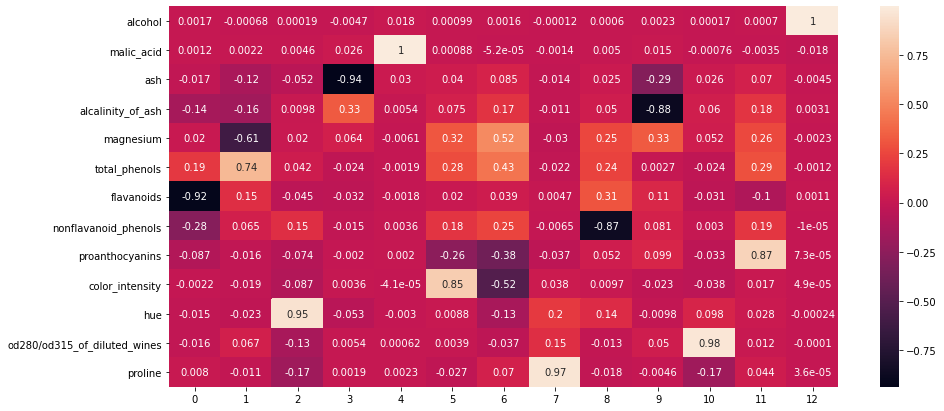

In [15]:
plt.figure(figsize=(15, 7))
sns.heatmap(pd.DataFrame(pca.components_, index=df_wine.columns), annot=True)

Será que não faltaria normalizarmos os dados? Vejamos o mesmo PCA, mas agora com o `df_wine_scaled`:

In [16]:
pca = PCA(n_components=df_wine_scaled.shape[1])
pca.fit(df_wine_scaled)

PCA(n_components=13)

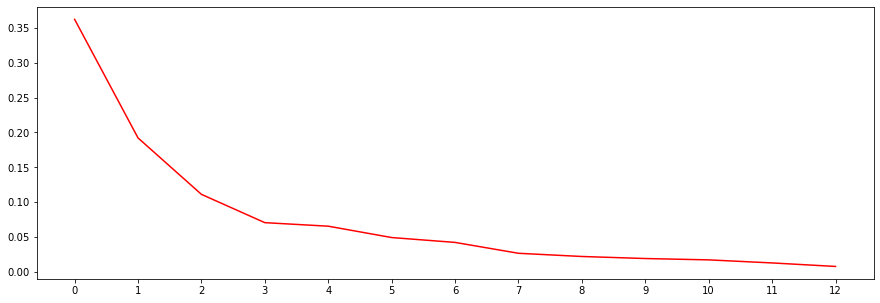

In [17]:
plt.figure(figsize=(15, 5)) # criando um gráfico retangular para facilitar a visualização
plt.plot(pca.explained_variance_ratio_, color='r') # colocando a porcentagem de variância que cada componente nos trouxe
plt.xticks(np.arange(df_wine.shape[1])) # mostrando todos os números no eixo x
plt.show() # mostrando o gráfico final

Parece mais justo, não é? Podemos ter um elbow já no **3** (ou seja, 4 componentes) ou, ainda, lá no **7** (ou seja, 8 componentes já que a contagem começou no 0 e não no 1). Em casos reais geralmente queremos menos componentes.

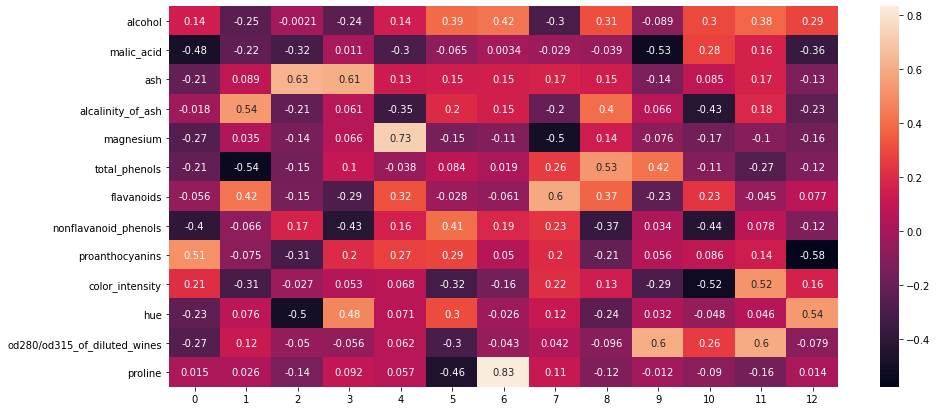

In [18]:
plt.figure(figsize=(15, 7))
sns.heatmap(pd.DataFrame(pca.components_, index=df_wine.columns), annot=True)

Melhor! Veja que no primeiro componente temos uma contribuição de fatores liderados pelo `proanthocyanins` e `malic_acid`. Já no segundo componente, `total_phenols`, `flavanoids`, `alcalinity_of_ash` e, em menor escala, `color_intensity`. Já no terceiro componente, `ash` e `hue` (de forma antagônica - veja que um é positivo e outro com sinal negativo). No quarto, `ash`, `hue` e `nonflanavoid_phenols` (agora com `ash` e `hue` com o mesmo sinal). Veja que todas as colunas influenciam em maior ou menor grau nos componentes.

De forma geral, é possível darmos um nome para os componentes de acordo com as colunas que mais trazem impacto e a relação entre elas: olhemos o componente **7**: os `flavanoids`, `magnesium` e `alcohol` trazem os maiores impactos. Os `flavanoids` são responsáveis (pelo que pesquisei rapidamente no Google) pela cor vívida nos alimentos e bebidas; `magnesium` é um metal importante para o nosso corpo e é presente no vinho; e o `alcohol` é a porcentagem de álcool na bebida. Aqui, vemos que um vinho com um alto número neste componente seria provavelmente um vinho de cor vívida (pela alta influência dos `flavanoids` e por ter sinal positivo), com baixo teor alcoólico e níveis de magnésio (visto pelo sinal negativo, mas alta representatividade destes valores). Logo, quem sabe não poderíamos renomear este componente **7** para **cor_vivida_baixo_alcool_e_manganes**? Sim, não é um nome nada inspirado - mas creio que conseguiu captar a ideia.

Finalmente, caso tenha interesse em ver o resultado final do PCA: observe como ficaria abaixo a tabela gerada com **4** componentes escolhidos.

In [19]:
pca = PCA(n_components=4)
pd.DataFrame(pca.fit_transform(df_wine_scaled))

,0,1,2,3
0,3.316751,-1.443463,-0.165739,-0.215631
1,2.209465,0.333393,-2.026457,-0.291358
2,2.516740,-1.031151,0.982819,0.724902
3,3.757066,-2.756372,-0.176192,0.567983
4,1.008908,-0.869831,2.026688,-0.409766
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527
174,-2.601956,-1.757229,0.207581,0.349496
175,-2.677839,-2.760899,-0.940942,0.312035
176,-2.387017,-2.297347,-0.550696,-0.688285


Além disso, vamos mostrar de forma gráfica como o PCA pode ajudar (e outras técnicas de seleção de atributos também). O `pairplot` é uma visualização a qual compara todos os atributos contra todos os atributos. Como nosso cérebro visualiza até 3 dimensões, para vermos mais do que isso precisamos recorrer para técnicas como esta. Veja que cada bolinha representa um produtor diferente. Note, ainda, que para algumas colunas conseguimos ver que há uma *certa* divisão entre os diferentes produtores, mas em outras fica difícil de fazermos esta separação.

Ora, se até para nós humanos é difícil de nos acharmos aqui com a _consciência_ de que estamos analisando vinhos, imagine então como seria para um algoritmo:

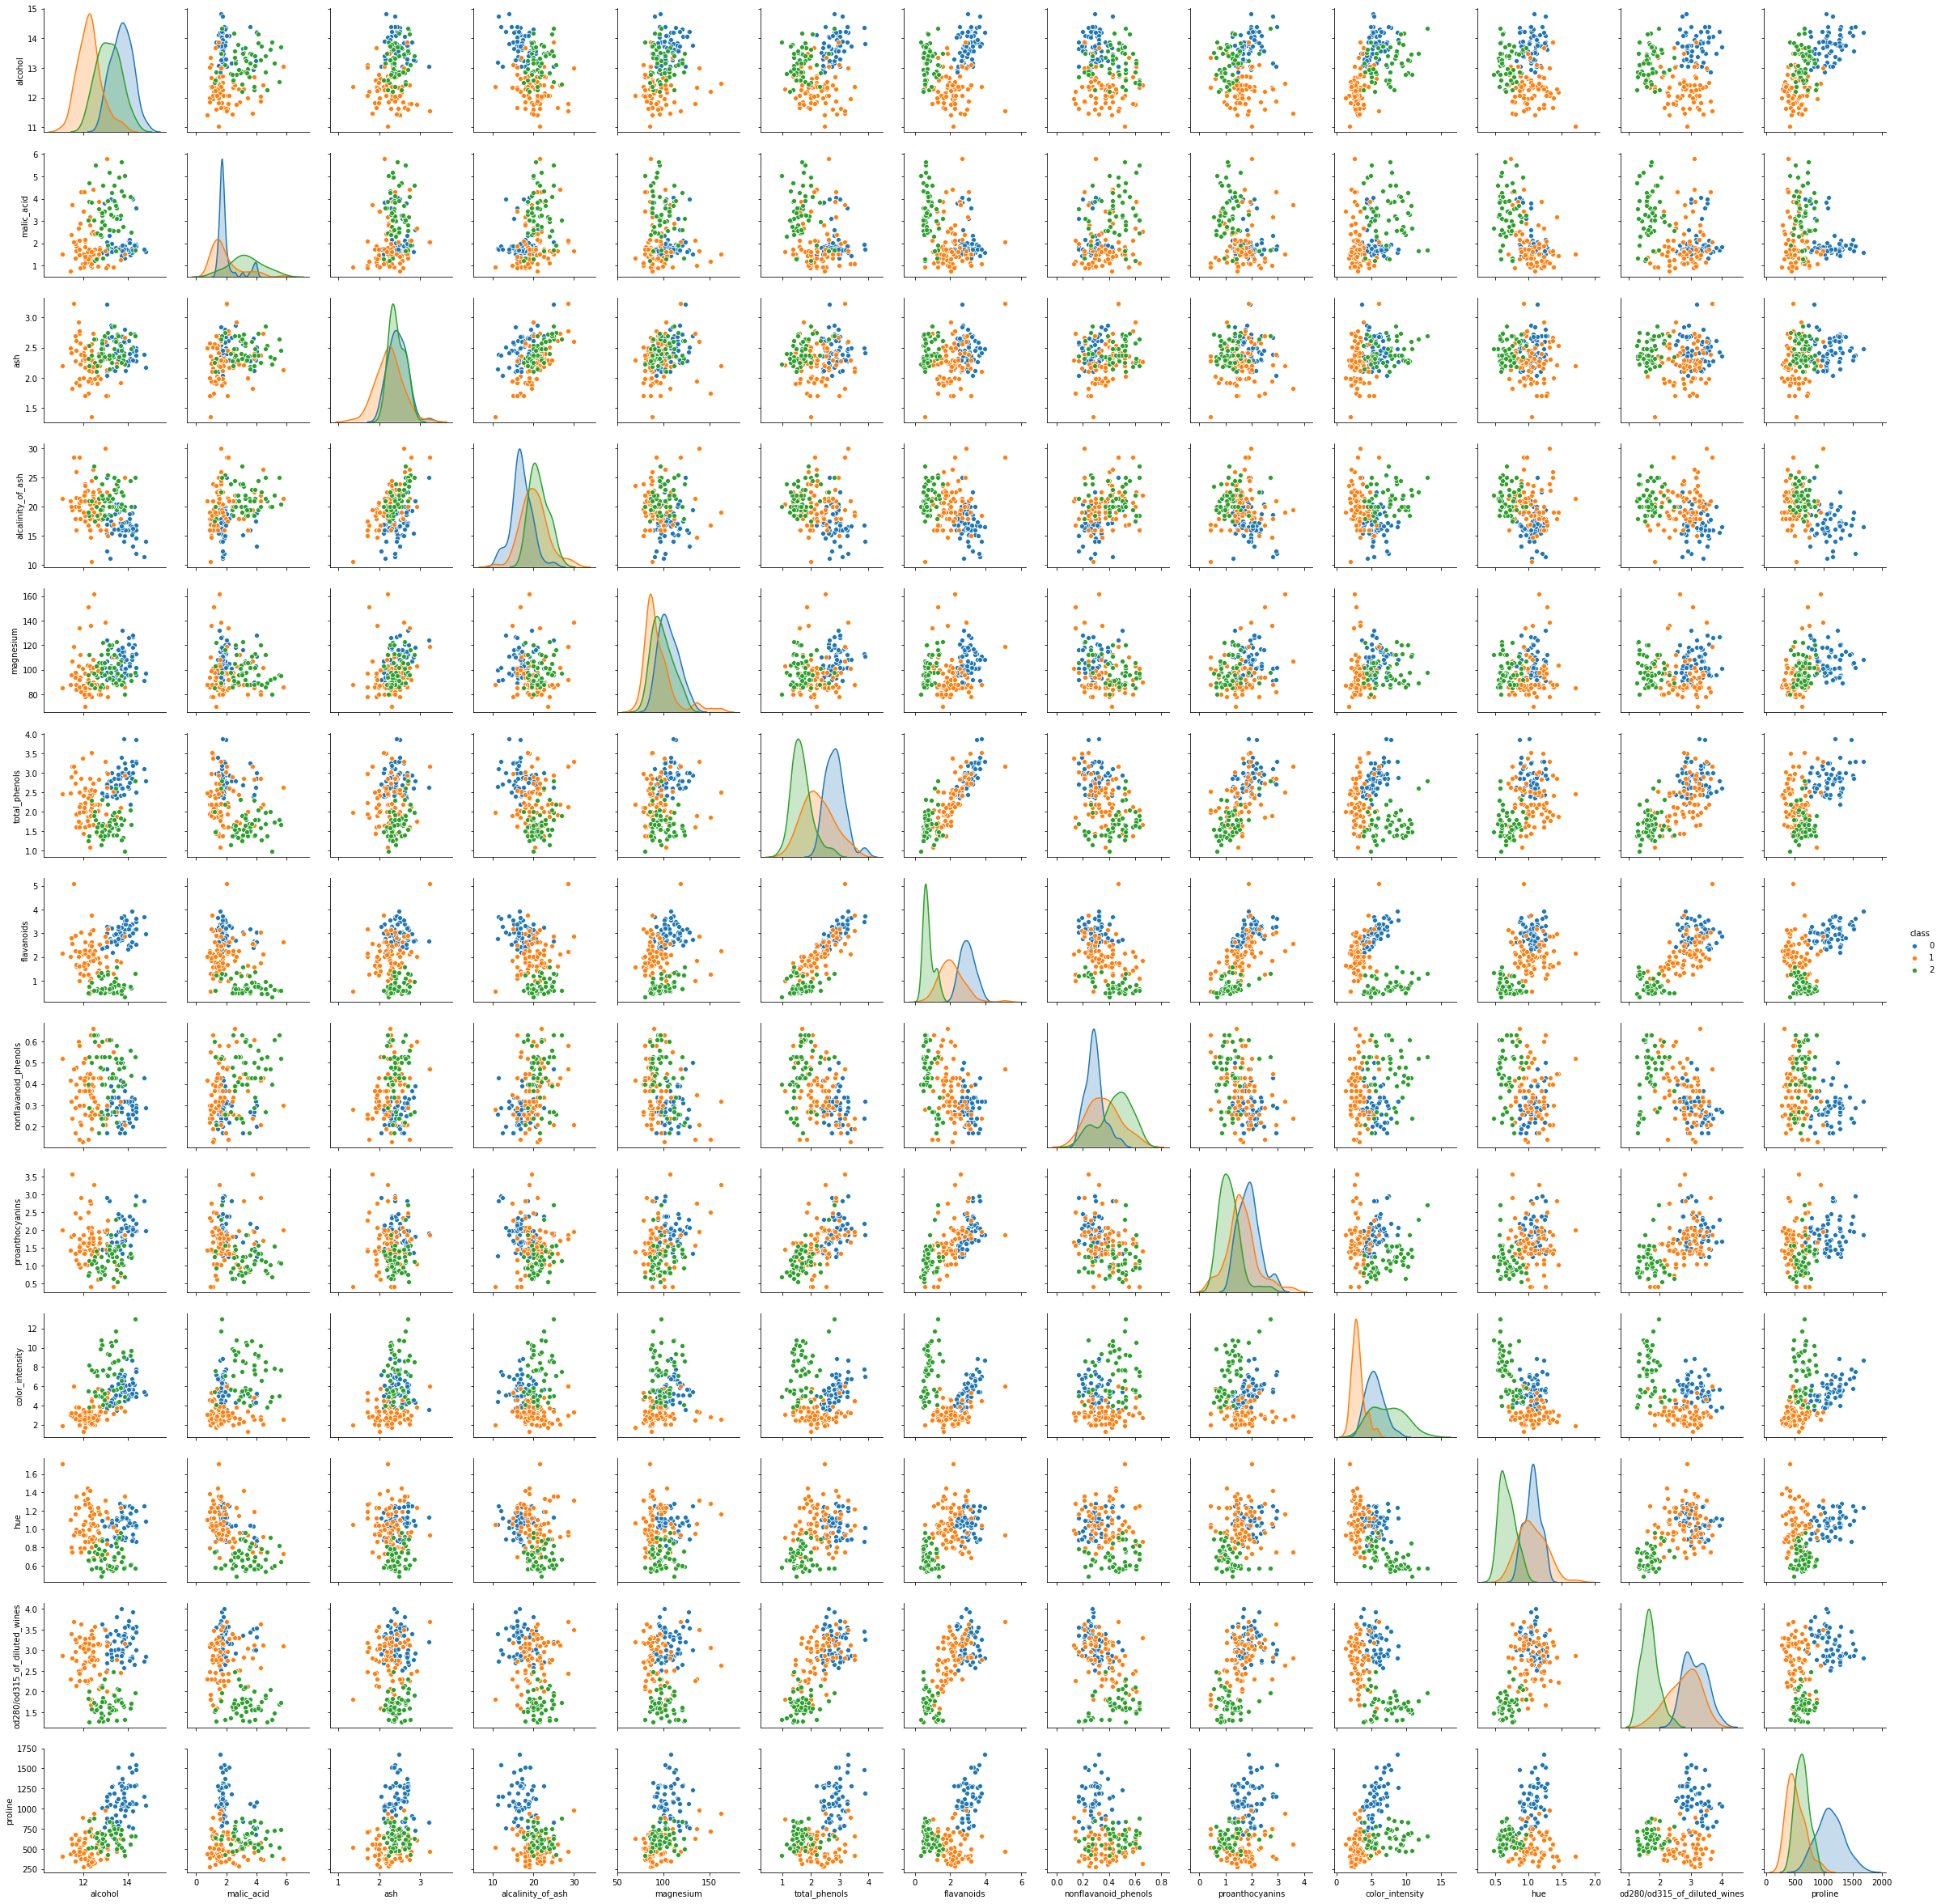

In [20]:
df_wine_plot = df_wine.copy() # criando uma cópia do df_wine para fins de visualização
df_wine_plot['class'] = target_wine # colocando os produtores dentro desta cópia para podermos separá-los no gráfico
sns.pairplot(df_wine_plot, hue='class') # criando o pairplot e dividindo por cor de produtor

Agora olhe para o mesmo `pairplot`, agora com o PCA aplicado. Tire as suas próprias conclusões. 🤐

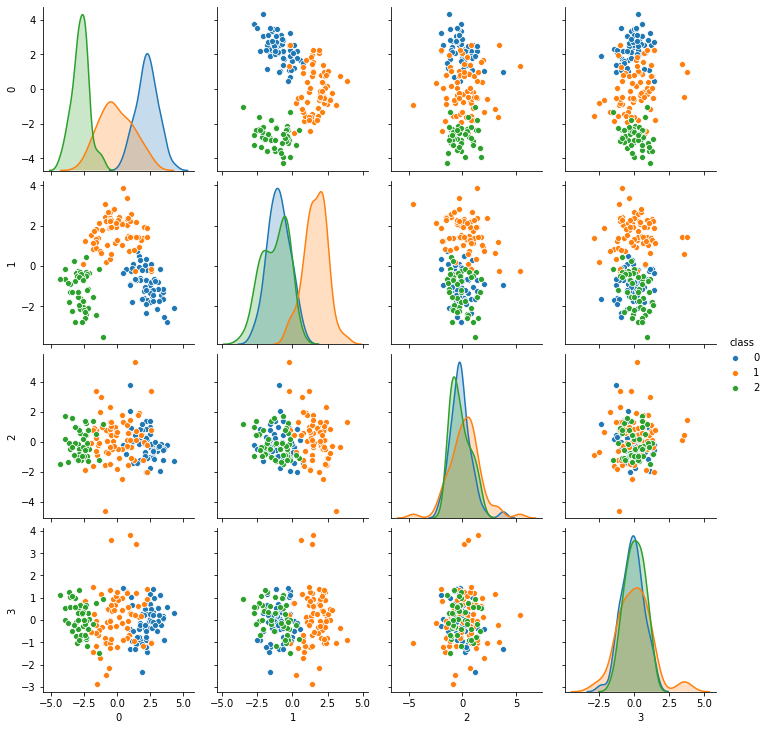

In [21]:
df_pca_resultado = pd.DataFrame(pca.fit_transform(df_wine_scaled))
df_pca_resultado['class'] = target_wine
sns.pairplot(df_pca_resultado, hue='class')

## Agrupamento
### KMeans e MiniBatchKMeans

O KMeans é a técnica mais conhecida de agrupamento (lembrando que agora estamos falando de agrupar **instâncias**, e não **atributos**). Neste caso e de forma similar ao que já fizemos anteriormente, aplicaremos o KMeans para o `df_wine`. Note que ele agrupa todos os dados disponíveis para a sua análise: logo, não é legal colocarmos uma classe/label no meio desta análise.

Além disso, o `MiniBatchKMeans` é efetivamente o `KMeans` para grandes bases de dados. Logo, nos concentraremos somente no `KMeans`. Note que ele possui um parâmetro chamado `random_state`: ele é o que chamamos também de _seed_: um código aleatório que define um ponto de partida aleatório. Aqui, deixamos um valor fixo para que toda execução tenha o mesmo resultado, não importando de qual computador façamos os testes.

Finalmente, para fins de visualização (lembra que o `sns.pairplot` com todas as colunas ficou gigante, certo?) estaremos já aplicando o `SelectKBest` para reduzir a quantidade de colunas sendo analisadas e colocadas em gráfico. Note também que estamos usando o `df_wine_scaled` como base da análise ao invés do `df_wine`: isto se dá porque precisamos que eles tenham uma mesma escala numérica.

In [22]:
sel = SelectKBest(k=5)
df_wine_kbest = pd.DataFrame(sel.fit_transform(df_wine_scaled, target_wine), columns=df_wine.columns[sel.get_support()])

'Resultados do KMeans com k=1'

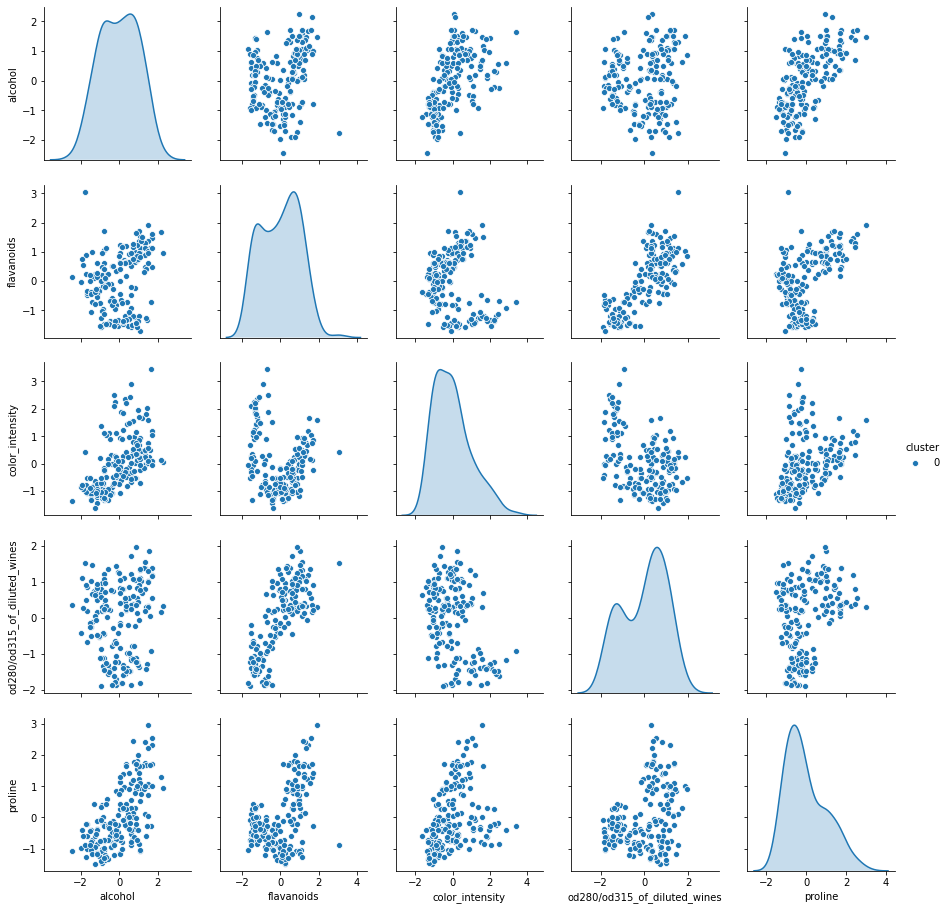

'Resultados do KMeans com k=2'

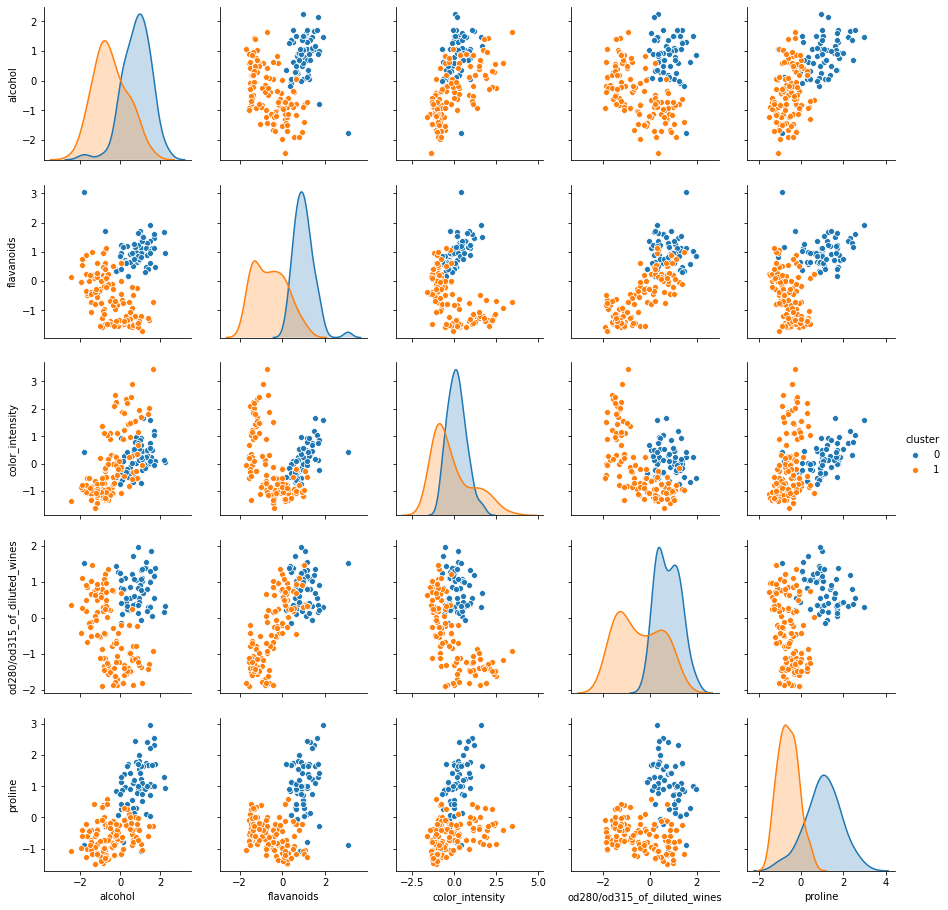

'Resultados do KMeans com k=3'

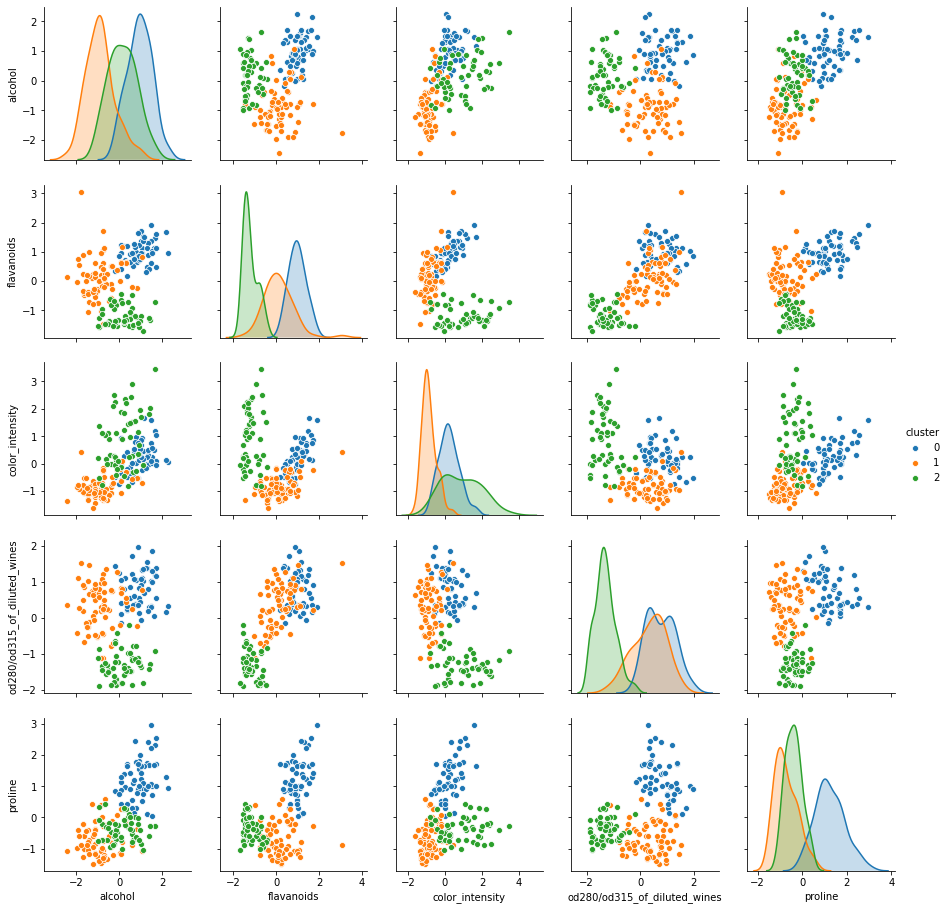

'Resultados do KMeans com k=4'

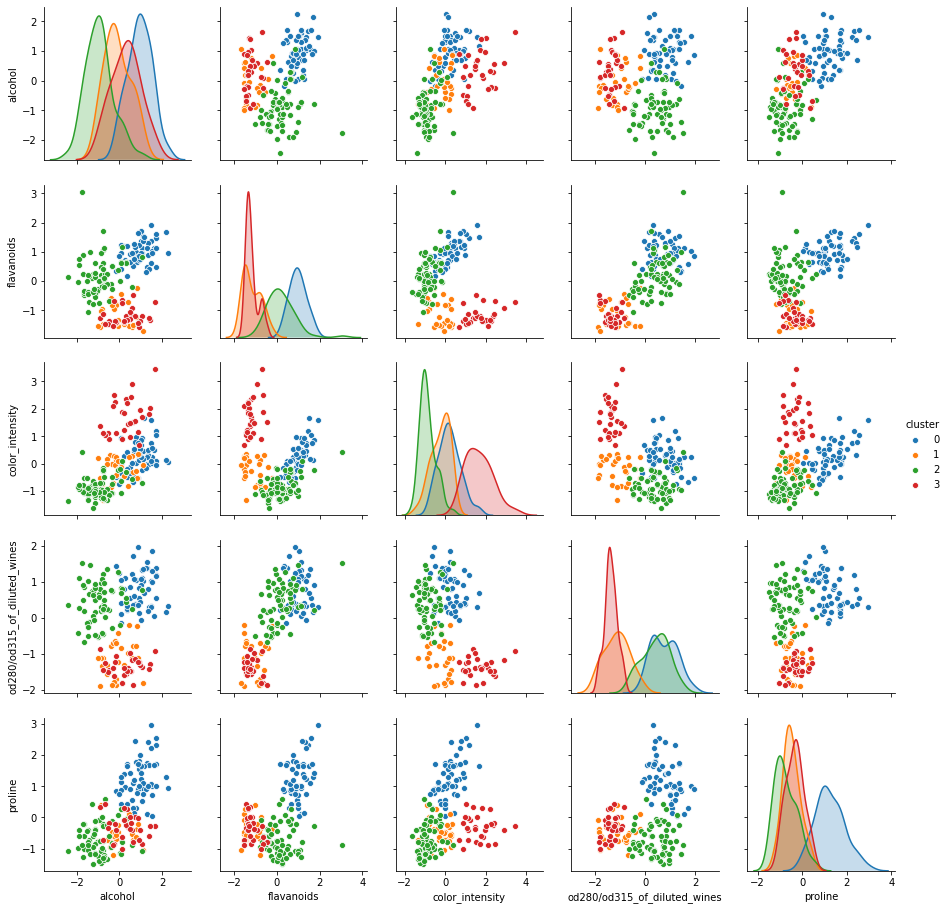

In [23]:
for i in range(1, 5):
    display(f'Resultados do KMeans com k={i}')
    df_wine_kmeans = df_wine_kbest.copy()
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_wine_kmeans)
    df_wine_kmeans['cluster'] = kmeans.predict(df_wine_kmeans)

    sns.pairplot(df_wine_kmeans, hue='cluster')
    plt.show()

### DBSCAN

O DBSCAN busca primeiramente encontrar exemplos que estão bem juntos/unidos/colados e, a partir daí, começa a encontrar os seus _vizinhos_. Ao contrário do KMeans, não requer um número de grupos/clusters. Todos os elementos que segundo ele não seriam membros de um cluster em específico ficariam dentro do cluster **-1**.

In [ ]:
df_wine_dbscan = df_wine_kbest.copy()
df_wine_dbscan['cluster'] = DBSCAN().fit_predict(df_wine_dbscan)

sns.pairplot(df_wine_dbscan, hue='cluster')
plt.show()

### OPTICS

O OPTICS é similar ao DBSCAN, mas pode levar a um agrupamento diferente uma vez que gera um cálculo que pode acabar por penalizar alguns elementos que não possuem tantos exemplos similares. Todos os elementos que segundo ele não seriam membros de um cluster em específico ficariam dentro do cluster **-1**.

In [ ]:
df_wine_optics = df_wine_kbest.copy()
df_wine_optics['cluster'] = OPTICS().fit_predict(df_wine_optics)

sns.pairplot(df_wine_optics, hue='cluster')
plt.show()